# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.


## Name: David Palumbo

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import os

In [126]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [127]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

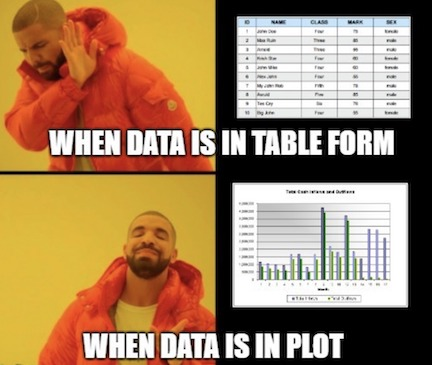


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



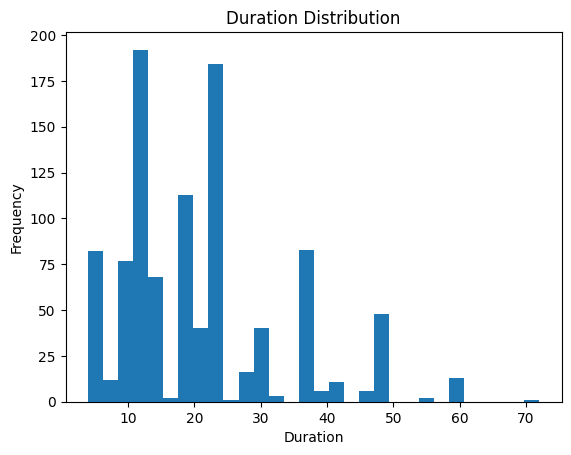

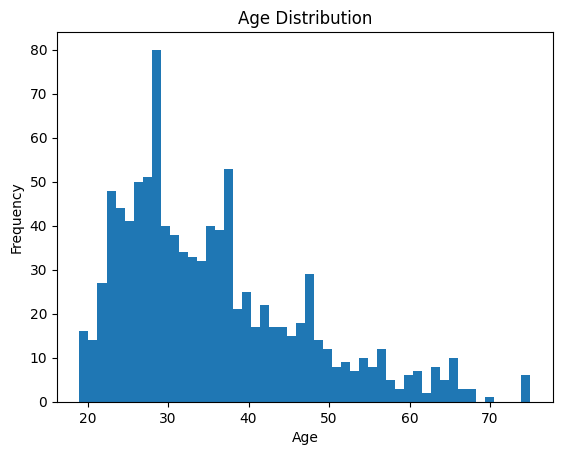

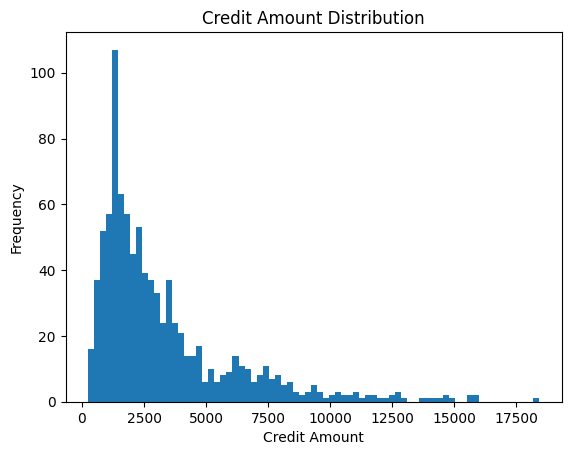

In [128]:
# YOUR CODE HERE
# Load the dataset
credit_dataset_path = os.path.join("data", "dataset_credit.csv")
credit_df = pd.read_csv(credit_dataset_path)

# labels = credit_ds.columns
# for i in range(0, len(labels)):
#     print(labels[i], ": \t", type(credit_ds.iloc[0,i]))

# Make a histogram for the distributions for credit_amount, age, and duration
# Extract a df with just those fields (numeric fields)
# NOTE: Thought it would be best to make individual graphs for each, rather than one graph, since they are over different ranges
ax0 = credit_df.loc[:,"duration"].plot.hist(bins=30)
ax0.set_xlabel("Duration")
ax0.set_title("Duration Distribution")
plt.show()
ax1 = credit_df.loc[:,"age"].plot.hist(bins=50)
ax1.set_xlabel("Age")
ax1.set_title("Age Distribution")
plt.show()
ax2 = credit_df.loc[:,"credit_amount"].plot.hist(bins=75)
ax2.set_xlabel("Credit Amount")
ax2.set_title("Credit Amount Distribution")
plt.show()

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



<AxesSubplot:title={'center':'credit_amount'}, xlabel='class'>

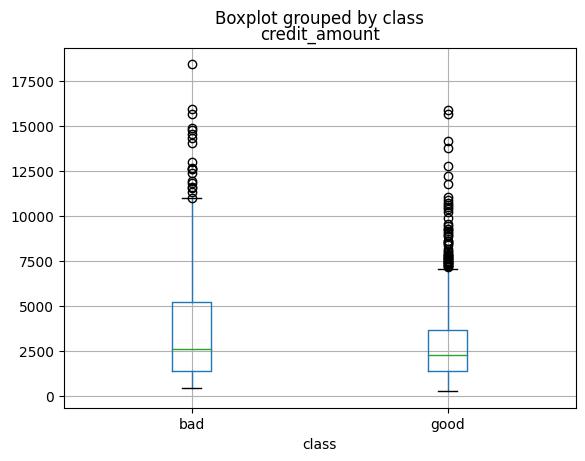

In [129]:
# Your code here

# Make a boxplot organized based on the class label
credit_df.boxplot(column=["credit_amount"], by="class")

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

'\nWhat do you infer about the data and its distribution from all the plots:\n1.1)    From the graphse in 1.1, we can see that all of the data seems to be skewed right.\n        In other words, there are many more data points on the lower half of the range.count\n1.2)    Similarly, from 1.2\'s box plots, we can see that both the good and the bad class have\n        possitivly skewed data.  We can also see that the interquartile range for the "good" class\n        is a bit smaller than that of the "bad" class, in regards to credit_amount.\n1.3)    In the graph from 1.3, we can see that our dataset labels are imbalanced.  The number of "good" labeled\n        points is much greater than the number of "bad" labeled data points.  More specifically, only 30% of our\n        data is in the "bad" class.\n'

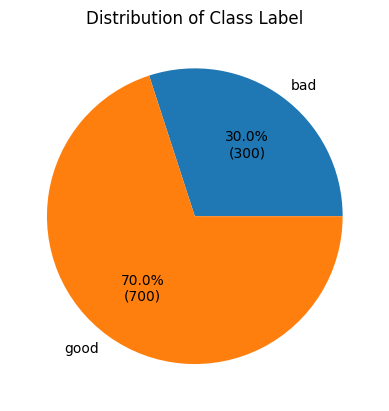

In [130]:
# Your code here
def pct_func(pct):
    val = int(np.around((pct * len(credit_df))/100))
    return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)

ax = credit_df.groupby("class").size().plot(kind="pie", autopct=pct_func)
ax.set_title("Distribution of Class Label")
"""
What do you infer about the data and its distribution from all the plots:
1.1)    From the graphse in 1.1, we can see that all of the data seems to be skewed right.
        In other words, there are many more data points on the lower half of the range.count
1.2)    Similarly, from 1.2's box plots, we can see that both the good and the bad class have
        possitivly skewed data.  We can also see that the interquartile range for the "good" class
        is a bit smaller than that of the "bad" class, in regards to credit_amount.
1.3)    In the graph from 1.3, we can see that our dataset labels are imbalanced.  The number of "good" labeled
        points is much greater than the number of "bad" labeled data points.  More specifically, only 30% of our
        data is in the "bad" class.
"""

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

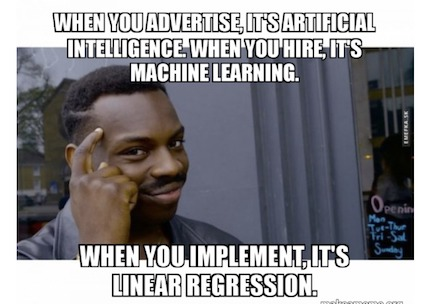

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [131]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

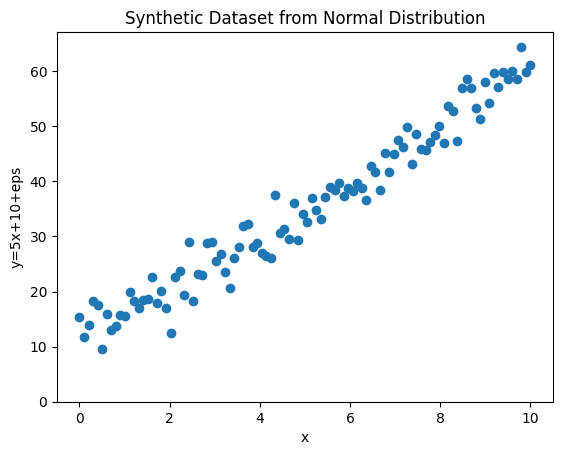

'\nDo the features have a linear Relationship?\n\nYes. They have possitive correlation as well.\n'

In [132]:
# Your code here
fig = plt.figure(1)
plt.scatter(x,y)
ax = plt.gca()
ax.set_ylim(bottom=0)
ax.set_title("Synthetic Dataset from Normal Distribution")
ax.set_xlabel("x")
ax.set_ylabel("y=5x+10+eps")
plt.show()

"""
Do the features have a linear Relationship?

Yes. They have possitive correlation as well.
"""

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [133]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv(os.path.join('data','auto-mpg.csv'))

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [134]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

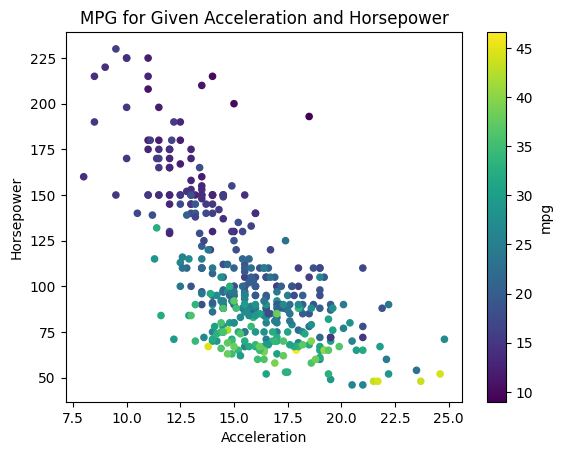

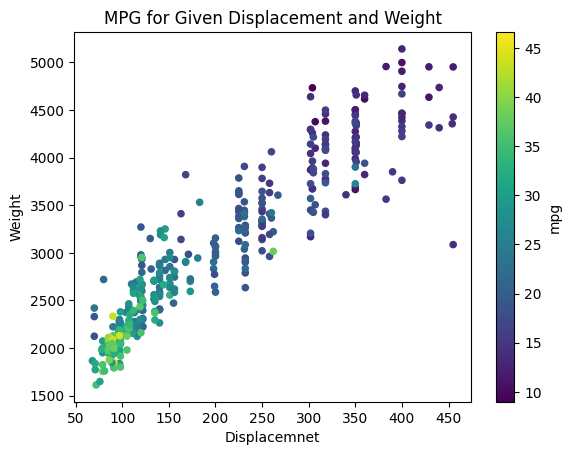

In [135]:
# Your code here
# Will make two plots, grouping together similar data ranges
# First will be displacement and horsepower
auto_mpg_df.plot.scatter(x='acceleration', y='horsepower', c='mpg')
ax = plt.gca()
ax.set_title("MPG for Given Acceleration and Horsepower")
ax.set_xlabel("Acceleration")
ax.set_ylabel("Horsepower")
plt.show()
# Second will be for displacement and weight
auto_mpg_df.plot.scatter(x='displacement', y='weight', c='mpg')
ax = plt.gca()
ax.set_title("MPG for Given Displacement and Weight")
ax.set_xlabel("Displacemnet")
ax.set_ylabel("Weight")
plt.show()

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

Text(0, 0.5, 'mpg')

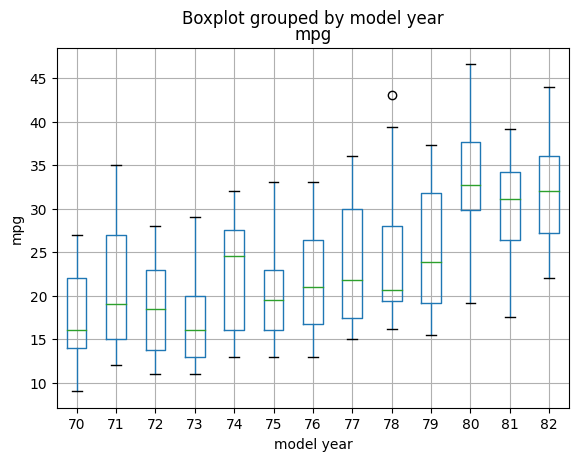

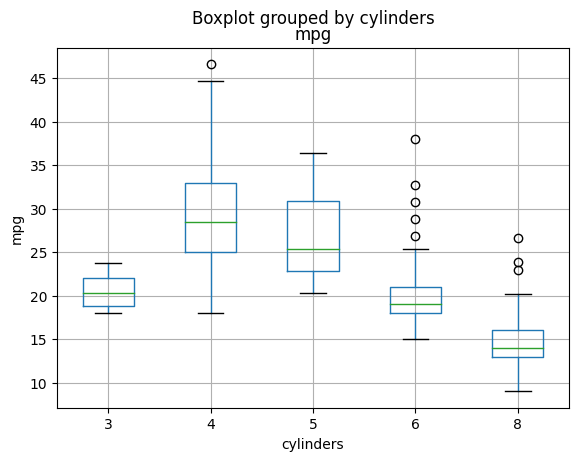

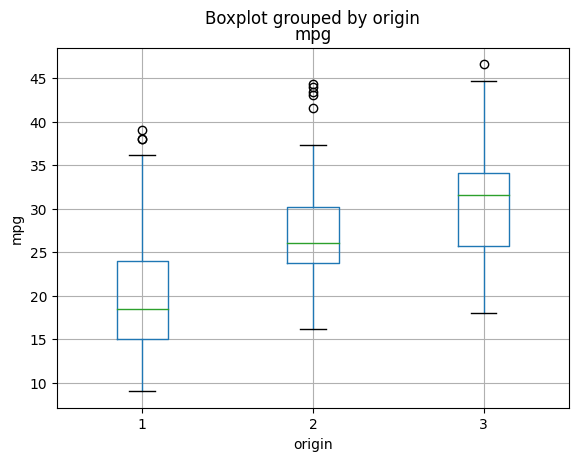

In [136]:
# Your code here
auto_mpg_df.boxplot(column=["mpg"], by="model year")
ax = plt.gca()
ax.set_ylabel("mpg")
auto_mpg_df.boxplot(column=["mpg"], by="cylinders")
ax = plt.gca()
ax.set_ylabel("mpg")
auto_mpg_df.boxplot(column=["mpg"], by="origin")
ax = plt.gca()
ax.set_ylabel("mpg")

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

In [137]:
# Your answer here 
"""
Is linear regression a good model for this problem?
Yes.  In terms of the numerical data, there seems to be a decent linear correlation of the data to the classifier.
For example, the higher the weight or displacement, the lower the mpg appears to be.
Acceleration and horsepower don't seem to show as much correlation to the class labels, but there still seems to be a little.  

The categorical data also shows some correlation to the classifier as well, though not as much as weight and displacement appear to have.
And it doesn't appear to always be linear correlation for the categorical data, like in the case of cylinders.
Though model_year does seem to show a general positive correlation.
"""

"\nIs linear regression a good model for this problem?\nYes.  In terms of the numerical data, there seems to be a decent linear correlation of the data to the classifier.\nFor example, the higher the weight or displacement, the lower the mpg appears to be.\nAcceleration and horsepower don't seem to show as much correlation to the class labels, but there still seems to be a little.  \n\nThe categorical data also shows some correlation to the classifier as well, though not as much as weight and displacement appear to have.\nAnd it doesn't appear to always be linear correlation for the categorical data, like in the case of cylinders.\nThough model_year does seem to show a general positive correlation.\n"

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [138]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [139]:
# Your code here
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 1. Encode categorical data
# Large number of unique values for model_year, so use target encoding
# Use one-hot encoding for the other two (cylinders and origin)

# Seperate the features out into groups
ohe_features = [
    "origin",
    "cylinders"    
]

te_features = [ 
    "model year"
]

num_features = [ 
    "displacement",
    "weight",
    "acceleration",
    "horsepower"
]

preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(handle_unknown="ignore"), ohe_features),
                                    (TargetEncoder(handle_unknown="value"), te_features),
                                    remainder="passthrough"
                                    )

# Note: fixed bug after submission so that OH-Encoding was actually done, but it changes some things
# Honestly, not sure if I need the OH-Encoding on the discrete features anyway

# 2. Split the dataset into training (60%) and validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

# 4. Add column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

# Since we are converting the X's to np arrays, for consistency, we will also convert the y dfs to np arrays
auto_mpg_y_train = auto_mpg_y_train.to_numpy()
auto_mpg_y_val = auto_mpg_y_val.to_numpy()
auto_mpg_y_test = auto_mpg_y_test.to_numpy()

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 [18.  29.  15.  27.2 44.3]


c:\Users\dpalumbo\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\dpalumbo\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [140]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        # The close form solution for ridge regression is the following:
        # w = (X^T@X + alpha*I)^(-1) * X^T@y

        # Need to make an identity matrix that is nxn
        m, n = X.shape
        iden = np.identity(n)

        self.w = (np.linalg.inv((X.T @ X) + (self.alpha * iden))) @ X.T @ y
            
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        
        ### Your code here

        return X @ self.w

        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [141]:
# Your code here
synth_model = LinearRegression(alpha=0)
synth_model.train(X_train, y_train)

yhat = synth_model.predict(X_test)

# Print first and last 3 predictions, along with actual labels
print("Predictions: \t\t\t Actual:")
for i in range(0,3):
    print(yhat[i], "\t\t", y_test[i])
print("...")
for i in range(0,3):
    print(yhat[-i], "\t\t", y_test[-i])

Predictions: 			 Actual:
23.29684501134215 		 23.26858868321747
53.01355016832193 		 56.97068214782239
11.410162948550244 		 13.946314962418228
...
23.29684501134215 		 23.26858868321747
14.38183346424822 		 13.730747485023368
26.763793946323126 		 20.724277261994885


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

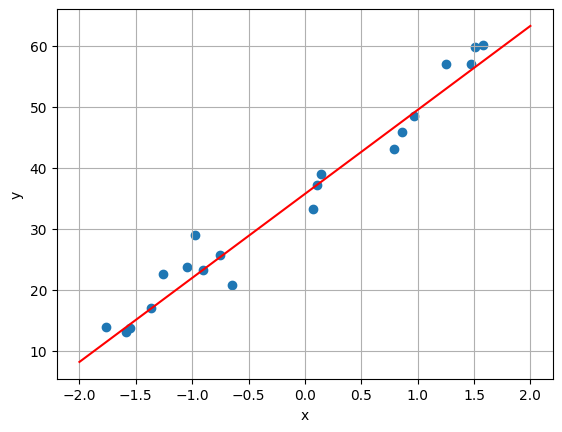

In [142]:
# Your code here
# Scatter points
plt.scatter(X_test[:,1],y_test)

# Find the line
x = np.linspace(-2, 2, 50)
y = synth_model.w[1] * x + synth_model.w[0]
plt.plot(x, y, '-r')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [143]:
# Your code here
from sklearn.metrics import mean_squared_error
mpg_model = LinearRegression(alpha=0)
mpg_model.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_yhat_train = mpg_model.predict(auto_mpg_X_train)
auto_mpg_yhat_val = mpg_model.predict(auto_mpg_X_val) 
auto_mpg_yhat_test = mpg_model.predict(auto_mpg_X_test)

# Find MSE
MSE_train = mean_squared_error(auto_mpg_y_train, auto_mpg_yhat_train)
MSE_val = mean_squared_error(auto_mpg_y_val, auto_mpg_yhat_val)
MSE_test = mean_squared_error(auto_mpg_y_test, auto_mpg_yhat_test)
print("MSE Errors")
print("Training Set MSE: \t", MSE_train)
print("Validation Set MSE: \t", MSE_val)
print("Test Set MSE: \t\t", MSE_test)

# Print first and last 3 predictions, along with actual labels
print("\nPredictions: \t\t\t Actual:")
for i in range(0,3):
    print(auto_mpg_yhat_test[i], "\t\t", auto_mpg_y_test[i])
print("...")
for i in range(0,3):
    print(auto_mpg_yhat_test[-i], "\t\t", auto_mpg_y_test[-i])


MSE Errors
Training Set MSE: 	 10.670584193330882
Validation Set MSE: 	 12.94479874878265
Test Set MSE: 		 10.881879498129612

Predictions: 			 Actual:
26.354685398566463 		 28.0
25.491336457849602 		 22.3
10.158772357637194 		 12.0
...
26.354685398566463 		 28.0
32.03222622916723 		 31.5
21.859528939660155 		 19.2


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [144]:
# Your code here
from sklearn.metrics import mean_squared_error

# Make the mean of the labels into the prediction for all points
train_label_mean = np.mean(auto_mpg_y_train)
print("Mean label: ", train_label_mean)

MSE_train = mean_squared_error(auto_mpg_y_train, np.full(auto_mpg_y_train.shape[0], train_label_mean))
MSE_val = mean_squared_error(auto_mpg_y_val, np.full(auto_mpg_y_val.shape[0], train_label_mean))
MSE_test = mean_squared_error(auto_mpg_y_test, np.full(auto_mpg_y_test.shape[0], train_label_mean))

print("MSE Errors")
print("Training Set MSE: \t", MSE_train)
print("Validation Set MSE: \t", MSE_val)
print("Test Set MSE: \t\t", MSE_test)

"""
Actual Errors were around 10 to 13, while these errors are around 60 to 63.  
Meaning that the regression is much better than simple averaging.
"""

Mean label:  23.854700854700855
MSE Errors
Training Set MSE: 	 60.56461465410184
Validation Set MSE: 	 60.47988929483249
Test Set MSE: 		 62.4616051879408


'\nActual Errors were around 10 to 13, while these errors are around 60 to 63.  \nMeaning that the regression is much better than simple averaging.\n'

**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

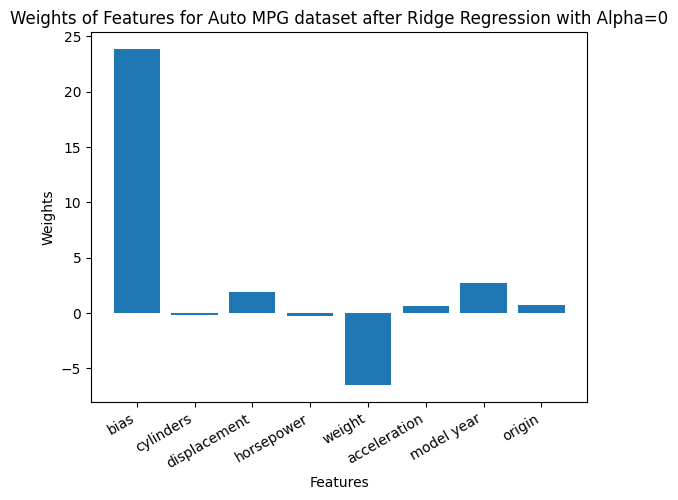

Made a second figure without the Bias, since it's weight was very large and the scale required to show it made it difficult to inspect the other weights.


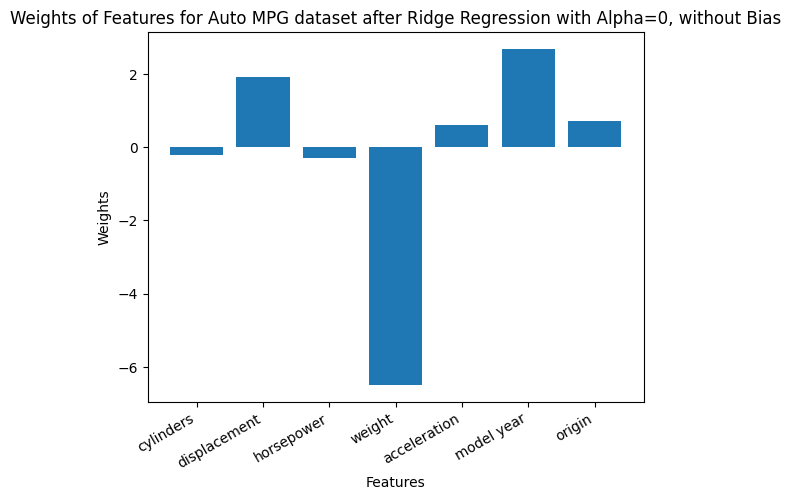

In [145]:
# Your code here
# Columns at the end will be One-Hot-Encdings 
cols_with_bias = auto_mpg_X.columns.copy()
cols_with_bias = cols_with_bias.insert(0, "bias")

cols_without_bias = cols_with_bias[1:]

plt.bar(cols_with_bias, mpg_model.w)
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of Features for Auto MPG dataset after Ridge Regression with Alpha=0")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.show()

# Made a second figure without the Bias, since it's weight was very large and the scale required to show it made it difficult to inspect the other weights.
print("Made a second figure without the Bias, since it's weight was very large and the scale required to show it made it difficult to inspect the other weights.")
plt.bar(cols_without_bias, mpg_model.w[1:])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of Features for Auto MPG dataset after Ridge Regression with Alpha=0, without Bias")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.show()

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

In [146]:
# Your answer here
"""
The weight on the bias seems to be very large, at least in comparison to actual features.
Other than that, the "weight" feature seems to have the strongest correlation with the output labels (negative/inverse correlation).
After that, displacement and model year seem to the next two most important, both with some possitive correlation.
This fits what was mentioned before when looking at the scatter and box plots for the discreate and continious features.
While having some weight, the discrete features do not carry very much linear correlation to the output labels, and therefore doesn't get assigned much weight by the model.
"""

'\nThe weight on the bias seems to be very large, at least in comparison to actual features.\nOther than that, the "weight" feature seems to have the strongest correlation with the output labels (negative/inverse correlation).\nAfter that, displacement and model year seem to the next two most important, both with some possitive correlation.\nThis fits what was mentioned before when looking at the scatter and box plots for the discreate and continious features.\nWhile having some weight, the discrete features do not carry very much linear correlation to the output labels, and therefore doesn\'t get assigned much weight by the model.\n'

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

Best Train MSE: 	12.645
Best Alpha: 		2.3357214690901213
Test MSE:  		10.999


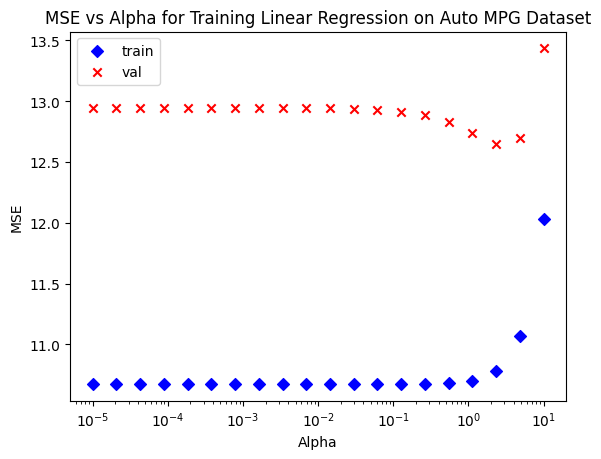

In [147]:
# Your code here
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Our LinearRegression model doesn't fit the scikit-learn estimator interface, so we have to write the grid search ourselves
val_mse = []
train_mse = []
alpha_vals = np.logspace(-5,1,20)
best_model = None
best_val_score = None
for idx in alpha_vals:
    auto_mpg_model = LinearRegression(alpha=idx)
    auto_mpg_model.train(auto_mpg_X_train, auto_mpg_y_train)
    auto_mpg_yhat_train = auto_mpg_model.predict(auto_mpg_X_train)
    train_mse.append(mean_squared_error(auto_mpg_y_train, auto_mpg_yhat_train))
    auto_mpg_yhat_val = auto_mpg_model.predict(auto_mpg_X_val)
    val_err = mean_squared_error(auto_mpg_y_val, auto_mpg_yhat_val)
    val_mse.append(val_err)
    if best_val_score is None or val_err < best_val_score:
        best_val_score = val_err
        best_model = auto_mpg_model

print(f"Best Train MSE: \t{np.min(val_mse):.3f}")
print(f"Best Alpha: \t\t{alpha_vals[np.argmin(val_mse)]}")

auto_mpg_yhat_test = best_model.predict(auto_mpg_X_test)
print(f"Test MSE:  \t\t{mean_squared_error(auto_mpg_y_test, auto_mpg_yhat_test):.3f}")

# Plot the training and validation MSEs
fig = plt.figure()
ax = plt.gca()
ax.scatter(alpha_vals, train_mse, c='b', marker='D', label='train')
ax.scatter(alpha_vals, val_mse, c='r', marker='x', label='val')
ax.set_ylabel("MSE")
ax.set_xlabel("Alpha")
ax.set_xscale("log")
ax.legend()
ax.set_title("MSE vs Alpha for Training Linear Regression on Auto MPG Dataset")
plt.show()

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

In [148]:
# Your answer here
"""
It makes sense that the training MSE is lower than the validation, since the training is trying to minimize the training MSE.
Since the training MSE is not suseptible to overfitting, the MSE starts low, even with a high model complexity, and only increases as a function of alpha.
Validation is suseptible to training overfitting with a highly complex model, so that is why the validation error decreases for a while as a function of alpha.
Until it eventually gets to a min at around alpha=2.3.  Then both the training and validation MSE start to raise rapidly as the model has such low complexity that it cannot represent the data properly.

"""

'\nIt makes sense that the training MSE is lower than the validation, since the training is trying to minimize the training MSE.\nSince the training MSE is not suseptible to overfitting, the MSE starts low, even with a high model complexity, and only increases as a function of alpha.\nValidation is suseptible to training overfitting with a highly complex model, so that is why the validation error decreases for a while as a function of alpha.\nUntil it eventually gets to a min at around alpha=2.3.  Then both the training and validation MSE start to raise rapidly as the model has such low complexity that it cannot represent the data properly.\n\n'

## Part 2: Logistic Regression

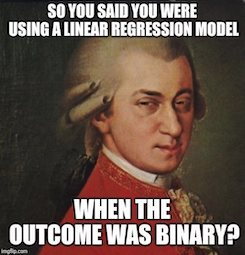






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


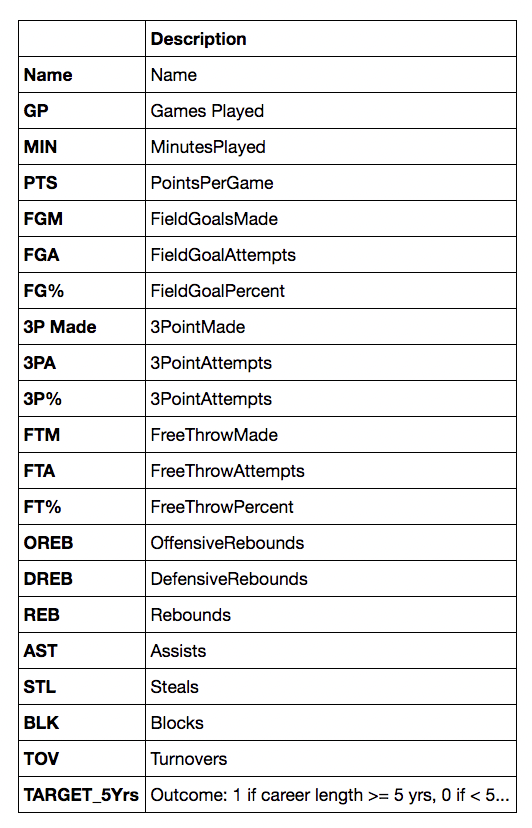

In [34]:
# Add checks for missing values
missing_values = ["NA", "na", "--"]
nba_reg = pd.read_csv(os.path.join("data", "nba_logreg.csv"),na_values=missing_values)
nba_reg.head()
nba_reg.shape

(1340, 21)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [35]:
# Your code here 
# Check if there are missing values in the dataset
nba_features = nba_reg.columns
nba_num_rows = nba_reg.shape[0]
print("Number of rows in NBA dataset: ", nba_num_rows)
m_feats = []
for feat in nba_features:
    null_rows = nba_reg[nba_reg[feat].isnull()]
    if len(null_rows) > 0:
        print("Feature: ", feat)
        # print the percentage that are missing
        print("Number missing val: ", null_rows.shape[0])
        print("Percent missing val: ", (null_rows.shape[0]/nba_num_rows)*100)
        m_feats.append(feat)
        

Number of rows in NBA dataset:  1340
Feature:  3P%
Number missing val:  11
Percent missing val:  0.8208955223880596


In [36]:
# Your Code here
# The only column we are missing is 3 point percent, but we have 3 points attempted and 3 points made.
# So we could just calculate a very close estimate of the %, based on the attempts and makes.
# Though, this raises the question of if this column is even needed, since it is depended on other data we have, and brings now new information
# So I think it makes sense to just drop the 3P% column all together (or even better, the other two it depends on, since that reduce dimensions more)
# But this leads down the rabit hole of of FTA, FTM, FGA, and FGM as well, since they also are redundent.

# NOTE: For now, I will simply fill in the estimate values for 3P%.
# NOTE: Turns out that all of the cases of the NaN, are when there were 0 attempts, which makes sense.  I will just make the assumption that it is okay to fill in 0% for these cases.
#       As it makes much more sense in a basketball sense than filling in 100%.  Essentially, it makes more sense, in the essence of basketball, to group the players with 0 attemps, with players with low make %.
#       We could also just drop these rows (since there are not that many), but it doesn't really seem necessary in this case.
nba_reg_new = nba_reg.copy()
for ind, row in nba_reg_new.iterrows():
    if pd.isnull(row["3P%"]):
        if row["3PA"] == 0:
            # No attempts, just set % to 0
            nba_reg_new.at[ind,"3P%"] = 0.0
        else:
            nba_reg_new.at[ind,"3P%"] = row["3P Made"]/row["3PA"]

m_feats = []
for feat in nba_features:
    null_rows = nba_reg_new[nba_reg_new[feat].isnull()]
    if len(null_rows) > 0:
        print("Feature: ", feat)
        # print the percentage that are missing
        print("Number missing val: ", null_rows.shape[0])
        print("Percent missing val: ", (null_rows.shape[0]/nba_num_rows)*100)
        m_feats.append(feat)

if len(m_feats) == 0:
    print("No more NA values in dataset.")

No more NA values in dataset.


**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

"\nNo, the distribution doesn't look balanced.  \n62% of the dataset has class label 1.0, and only 38% has class label 0.0\n"

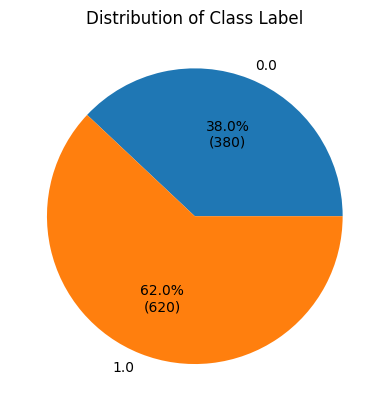

In [37]:
# Your code here
ax = nba_reg_new.groupby("TARGET_5Yrs").size().plot(kind="pie", autopct=pct_func)
ax.set_title("Distribution of Class Label")

"""
No, the distribution doesn't look balanced.  
62% of the dataset has class label 1.0, and only 38% has class label 0.0
"""

In [38]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1340, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

C:\Users\dpalumbo\AppData\Local\Temp\ipykernel_25648\3375356139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = nba_reg_new.corr()


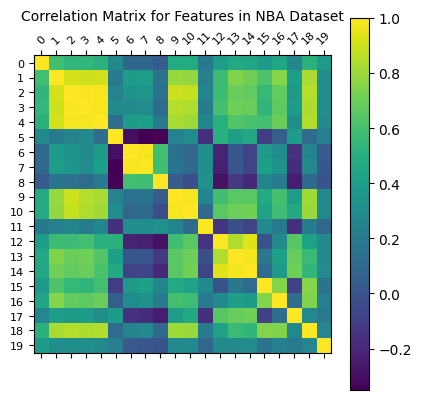

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (6, 7), (9, 10), (12, 14), (13, 14)]
Dropping columns with ind: 
 [2, 3, 4, 7, 10, 12, 13]
Dropping columns with names: 
 Index(['MIN', 'PTS', 'FGM', '3P Made', 'FTM', 'FT%', 'OREB'], dtype='object')
Columns left: 
 Index(['Name', 'GP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'TARGET_5Yrs'],
      dtype='object')


'\nWhy is it important that we drop highly correlated features?\nFirst of all, it is adding complexity (and computation time) to any of our training and predictions, without adding meaningful information, since it is essentially just redundant data.\nSecond of all, it add a synthetic importance on the feature at the start of training, since there will essentially be twice the initial weight given to this (combined) feature.  This could mess up the training process.\n'

In [39]:
# Your code here
corr_mat = nba_reg_new.corr()
num_feat = corr_mat.shape[0]

plt.matshow(corr_mat)
plt.yticks(range(0,num_feat), fontsize=8)
plt.xticks(range(0,num_feat), fontsize=8, rotation=45)
ax = plt.gca()
plt.colorbar()
plt.title("Correlation Matrix for Features in NBA Dataset", fontsize=10)
plt.show()

# Find the features with high correlation
pairs = []
freq_map = np.zeros(num_feat)
for i in range(0,num_feat):
    for j in range(i+1,num_feat):
        if corr_mat.iloc[i,j] >= 0.9:
            pairs.append((i,j))
            freq_map[i] += 1
            freq_map[j] += 1

print(pairs)

# For all our pairs, we need to drop one of the columns.
# We should do this such that we can drop the most amount of features to reduce model complexity.
# While making sure to not drop too many as to lose information.
drop_inds = []
for (i,j) in pairs:
    if freq_map[i]>=freq_map[j]:
        if not (j in drop_inds):
            drop_inds.append(j)
    else:
        if not(i in drop_inds):
            drop_inds.append(i)

print("Dropping columns with ind: \n", drop_inds)
print("Dropping columns with names: \n", nba_reg_new.columns[drop_inds])

nba_reg_new = nba_reg_new.drop(nba_reg_new.columns[drop_inds], axis=1) 

nba_features = nba_reg_new.columns
print("Columns left: \n", nba_reg_new.columns)

"""
Why is it important that we drop highly correlated features?
First of all, it is adding complexity (and computation time) to any of our training and predictions, without adding meaningful information, since it is essentially just redundant data.
Second of all, it add a synthetic importance on the feature at the start of training, since there will essentially be twice the initial weight given to this (combined) feature.  This could mess up the training process.
"""


**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [40]:
# Split data into features and labels

nba_new_X = nba_reg_new.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_Y = nba_reg_new['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [41]:
# Your code here
# 1. There is no "male" and "female", so skipping that step

# 2. Convert label from pandas to numpy vect
nba_new_Y = nba_new_Y.to_numpy().reshape(-1,1)
print(nba_new_Y.shape)

# 3. Split into train, val, test sets
nba_new_X_dev, nba_new_X_test, nba_new_Y_dev, nba_new_Y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=0)
nba_new_X_train, nba_new_X_val, nba_new_Y_train, nba_new_Y_val = train_test_split(nba_new_X_dev, nba_new_Y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matricies
scaler = StandardScaler()
nba_new_X_train = scaler.fit_transform(nba_new_X_train)
nba_new_X_val = scaler.transform(nba_new_X_val)
nba_new_X_test = scaler.transform(nba_new_X_test)

# 5. Add bias column
nba_new_X_train = np.hstack([np.ones((nba_new_X_train.shape[0], 1)), nba_new_X_train])
nba_new_X_val = np.hstack([np.ones((nba_new_X_val.shape[0], 1)), nba_new_X_val])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])

print(nba_new_X_train[:5], '\n\n', nba_new_Y_train[:5])

(1340, 1)
[[ 1.         -0.49124679 -1.01745338  0.12284448 -0.73682123 -1.1886794
  -0.78519388 -0.90206315 -0.75538441 -0.90682315 -0.787819   -0.64101233
  -0.94568598]
 [ 1.         -0.96746373  0.02855171 -1.98316695  2.71463591  0.68906735
  -0.78519388 -0.31764835 -0.50984019 -0.70938161 -0.30245005 -0.1773381
  -0.94568598]
 [ 1.          0.16355149 -0.7064789  -0.02640043 -0.64094742 -1.1886794
  -0.70844991 -0.975115   -0.95181978  0.34363997 -0.54513453 -0.40917521
  -0.12355782]
 [ 1.          0.04449726 -0.42377482  0.70324133 -0.73682123 -1.1886794
   0.4427096   0.04761091  0.32501014 -0.51194006 -0.54513453  0.51817326
   0.01346354]
 [ 1.         -0.66982814  0.08509252 -1.20377689  0.89303353  0.88869491
  -0.32473007 -0.60985575 -0.70627556  0.87015076  0.91097232 -0.87284945
  -0.12355782]] 

 [[0.]
 [0.]
 [1.]
 [1.]
 [0.]]


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [42]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))            
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

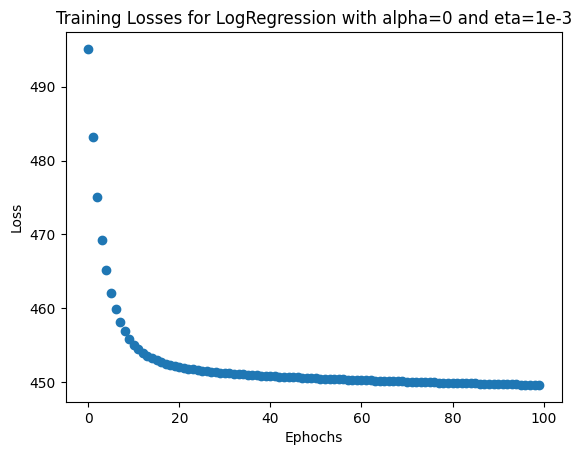

In [43]:
# Your code here 
# Part A
model_a = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses_a = model_a.train(nba_new_X_train, nba_new_Y_train)

plt.scatter(np.arange(100), losses_a)
plt.xlabel("Ephochs")
plt.ylabel("Loss")
plt.title("Training Losses for LogRegression with alpha=0 and eta=1e-3")
plt.show()

In [44]:
# Part B and C
alpha_min = 0
alpha_max = 1

eta_min = 0
eta_max = 0.001

t_min = 0
t_max = 100

sample_num = 20
# Take 20 random samples from our hyperparam ranges to determine best model
alpha_samples = np.random.uniform(alpha_min, alpha_max, sample_num)
eta_samples = np.random.uniform(eta_min, eta_max, sample_num)
t_samples = np.random.uniform(t_min, t_max, sample_num).astype(int)

best_alpha = None
best_eta = None
best_t = None
best_model = None
best_val_MSE = None
best_train_MSE = None

# TODO: For now we will assume that we are only running 20 total samples
#       Might change it to 20 samples, and then each combination of these samples.
for i in range(0, sample_num):
    # Make model with sampled parameters and then train 
    temp_model = LogisticRegression(alpha=alpha_samples[i], eta=eta_samples[i], t=t_samples[i])
    train_losses = temp_model.train(nba_new_X_train, nba_new_Y_train)

    # Find the MSE for the validation set
    yhat = temp_model.predict(nba_new_X_val)
    val_MSE = mean_squared_error(yhat, nba_new_Y_val)

    if best_val_MSE is None or val_MSE < best_val_MSE:
        best_model = temp_model
        best_val_MSE = val_MSE
        best_alpha = alpha_samples[i]
        best_eta = eta_samples[i]
        best_t = t_samples[i]
        train_yhat = temp_model.predict(nba_new_X_train)
        best_train_MSE = mean_squared_error(train_yhat, nba_new_Y_train)

print(f"Best Train MSE: \t{(best_train_MSE):.3f}")
print(f"Best Val MSE: \t\t{(best_val_MSE):.3f}")
print(f"Best Alpha: \t\t{best_alpha}")
print(f"Best Eta: \t\t{(best_eta):.3f}")
print(f"Best Num of Epochs \t{best_t}")

# Compare Accuracy on Test Set from Part a and b
yhat_a = model_a.predict(nba_new_X_test)
yhat_b = best_model.predict(nba_new_X_test)

MSE_a = mean_squared_error(nba_new_Y_test, yhat_a)
MSE_b = mean_squared_error(nba_new_Y_test, yhat_b)

print("-- Compare Accuracy for A and B --")
print(f"MSE for Part A Model: \t{(MSE_a):.3f}")
print(f"MSE for Part B Model: \t{(MSE_b):.3f}")

Best Train MSE: 	0.305
Best Val MSE: 		0.287
Best Alpha: 		0.42876870094576613
Best Eta: 		0.001
Best Num of Epochs 	5
-- Compare Accuracy for A and B --
MSE for Part A Model: 	0.310
MSE for Part B Model: 	0.291


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

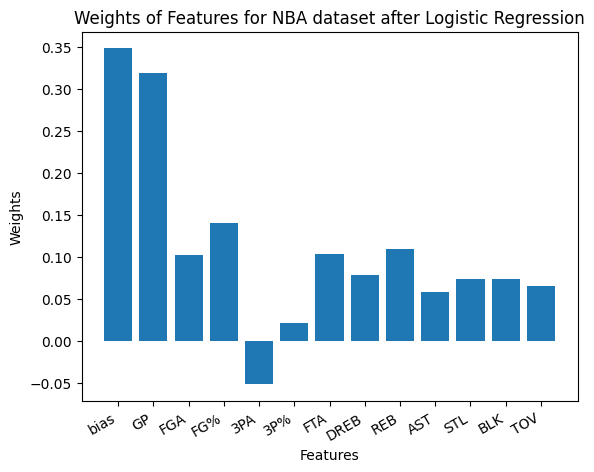

" \nIt looks, from the graph, that the feature with the highest correlation to the output label was Games played.\nThis makes sense as, obviously, the more years you play, the more likely you are to play more games.\nAfter that though, there was FG%, FTA, and REB.  This makes sense as they are some of the most important stats in the game,\nand the better a player is at them, the more likely they are to stay in the league longer.\n\nThe only weight to snow negative/inverse correlation was 3PA (per game), which kind of makes sense, since just taking attemps doesn't mean that the player is making them.\nAnd if they are just taking shots, that might not be good for the team, meaning that they are less likely to stay in the league.  \n"

In [45]:
# Your code here
cols_with_bias = nba_new_X.columns.copy()
cols_with_bias = cols_with_bias.insert(0, "bias")

plt.bar(cols_with_bias, best_model.w[:,0])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of Features for NBA dataset after Logistic Regression")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.show()

""" 
It looks, from the graph, that the feature with the highest correlation to the output label was Games played.
This makes sense as, obviously, the more years you play, the more likely you are to play more games.
After that though, there was FG%, FTA, and REB.  This makes sense as they are some of the most important stats in the game,
and the better a player is at them, the more likely they are to stay in the league longer.

The only weight to snow negative/inverse correlation was 3PA (per game), which kind of makes sense, since just taking attemps doesn't mean that the player is making them.
And if they are just taking shots, that might not be good for the team, meaning that they are less likely to stay in the league.  
"""


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [46]:
cancer_df = pd.read_csv(os.path.join('data', 'breast-cancer.csv'))
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [48]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

Model Score:
Score for training: 	0.991
Score for validation: 	0.930
Score for testing: 	0.947


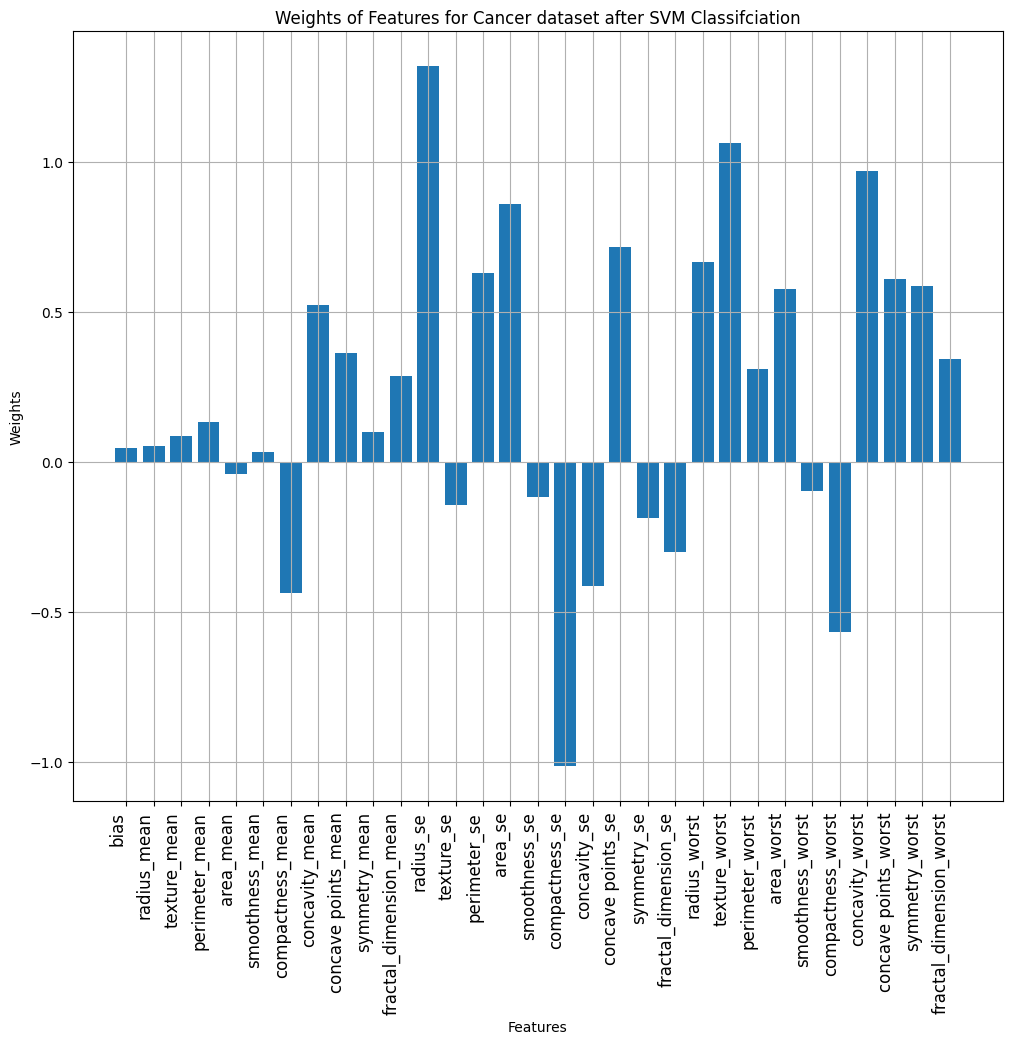

' \nThe model seems to heavily weight radius_se, texture_worst, and concavity_worst with possitive correlation/\nAnd heavily weight compactness_se with negative/inverse correlation\n'

In [49]:
# Your code here
from sklearn.svm import LinearSVC

# Train the model
svm_model = LinearSVC(dual=False)
svm_model.fit(cancer_X_train, cancer_y_train[:,0])

# Test the accuracy
score_train = svm_model.score(cancer_X_train, cancer_y_train[:,0])
score_val = svm_model.score(cancer_X_val, cancer_y_val[:,0])
score_test = svm_model.score(cancer_X_test, cancer_y_test[:,0])

print("Model Score:")
print(f"Score for training: \t{(score_train):.3f}")
print(f"Score for validation: \t{(score_val):.3f}")
print(f"Score for testing: \t{(score_test):.3f}")

# Graph feature weights
cols_with_bias = cancer_X.columns.copy()
cols_with_bias = cols_with_bias.insert(0, "bias")

f = plt.figure()
plt.bar(cols_with_bias, svm_model.coef_[0])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of Features for Cancer dataset after SVM Classifciation")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment="right", fontsize=12)
f.set_figwidth(12)
f.set_figheight(10)
plt.grid()
plt.show()

""" 
The model seems to heavily weight radius_se, texture_worst, and concavity_worst with possitive correlation/
And heavily weight compactness_se with negative/inverse correlation
"""

### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

Model Score:
Score for training: 	0.991
Score for validation: 	0.930
Score for testing: 	0.947


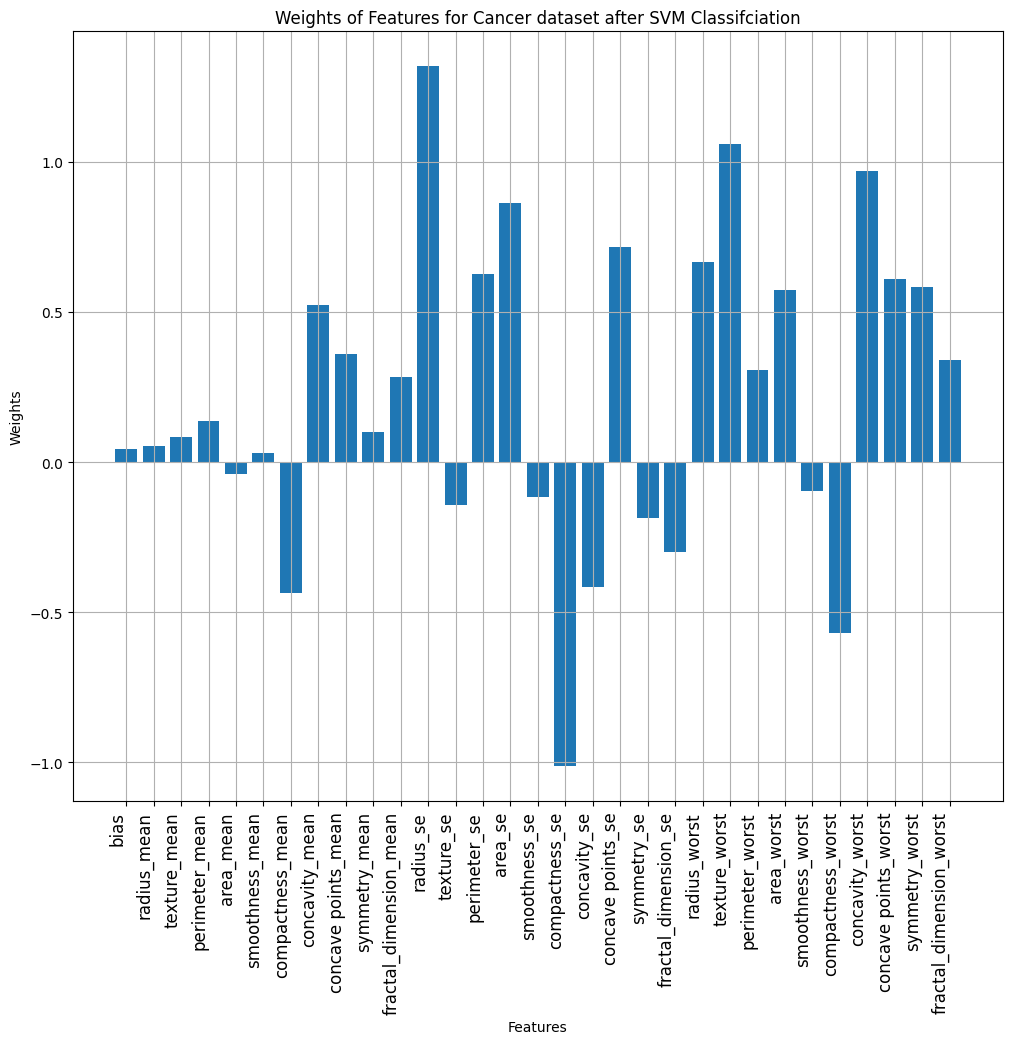

' \nThe (essentially) same model was trained with the dual method.\n'

In [50]:
# Your code here
# Very similar to primal code wise
from sklearn.svm import LinearSVC

# Train the model
svm_model = LinearSVC(dual=True)
svm_model.fit(cancer_X_train, cancer_y_train[:,0])

# Test the accuracy
score_train = svm_model.score(cancer_X_train, cancer_y_train[:,0])
score_val = svm_model.score(cancer_X_val, cancer_y_val[:,0])
score_test = svm_model.score(cancer_X_test, cancer_y_test[:,0])

print("Model Score:")
print(f"Score for training: \t{(score_train):.3f}")
print(f"Score for validation: \t{(score_val):.3f}")
print(f"Score for testing: \t{(score_test):.3f}")

# Graph feature weights
cols_with_bias = cancer_X.columns.copy()
cols_with_bias = cols_with_bias.insert(0, "bias")

f = plt.figure()
plt.bar(cols_with_bias, svm_model.coef_[0])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of Features for Cancer dataset after SVM Classifciation")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment="right", fontsize=12)
f.set_figwidth(12)
f.set_figheight(10)
plt.grid()
plt.show()

""" 
The (essentially) same model was trained with the dual method.
"""
